# Import and Install Dependencies

### The following commands install the necessary packages for this project:
TensorFlow 2.4.1 and TensorFlow-GPU 2.4.1: These are essential for running deep learning models.
TensorFlow-GPU allows the use of GPU acceleration to speed up computations if you dont have a dedicated gpu u can skip this steps.

OpenCV: This library is used for computer vision tasks such as image and video processing

Mediapipe: A framework for building multimodal (e.g., video, audio) applied machine learning pipelines.

Scikit-learn: A machine learning library for Python, providing simple and efficient tools for data mining and data analysis.

Matplotlib: A plotting library for creating static, animated, and interactive visualizations in Python.

In [1]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 
# !pip install opencv-python 
# mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic
The following code sets up and uses the Mediapipe Holistic model to detect keypoints on the face, body, and hands. It also includes functions for processing images and drawing the detected landmarks.

- mp_holistic: Initializes the Mediapipe Holistic model which integrates face, pose, and hand landmarks.
- mp_drawing: Provides utilities to draw the detected landmarks on the images.

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

# mediapipe_detection(image, model): This function processes an image using the specified Mediapipe model.
- Converts the image from BGR to RGB color space.
- Sets the image to read-only mode before processing.
- After making predictions, converts the image back to BGR color space.
- Returns the processed image and the results.

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

# draw_landmarks(image, results): Draws the detected landmarks on the image using default styles.
- Draws face mesh, pose, left hand, and right hand landmarks.

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

# draw_styled_landmarks(image, results): Draws the detected landmarks with custom styles.
- Applies specific colors, thickness, and circle radius to different types of landmarks (face, pose, left hand, right hand).

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

# Main Loop: Captures video from the webcam, processes each frame using the Mediapipe Holistic model, and draws the detected landmarks.
- Opens a video capture stream.
- Processes each frame to detect and draw landmarks.
- Displays the processed frames until 'q' is pressed to exit.

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# Visualizing Keypoints
This section of the code demonstrates how to draw detected landmarks on a frame and visualize the results using Matplotlib.

- draw_landmarks(frame, results): This function call draws the detected landmarks on the current video frame. The landmarks include face, pose, left hand, and right hand keypoints.

In [8]:
draw_landmarks(frame, results)

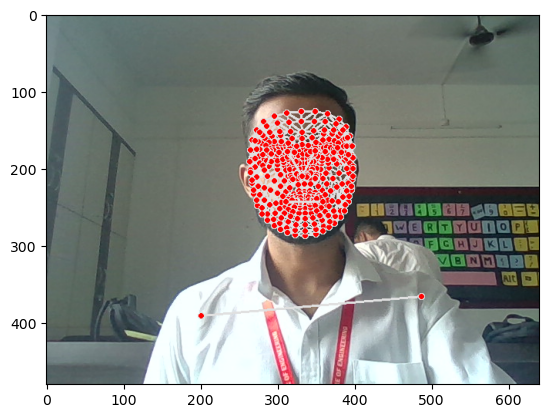

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values
The following code extracts the keypoint values from the detected landmarks and prepares them for further processing or analysis.

Extracting Keypoints
- len(results.right_hand_landmarks.landmark): This line of code checks the number of landmarks detected for the right hand. It helps in verifying the presence and count of landmarks.# 3. Extract Keypoint Values

In [2]:
len(results.right_hand_landmarks.landmark)

NameError: name 'results' is not defined

# Pose Keypoints
- pose: This array stores the keypoints of the detected pose landmarks, including x, y, z coordinates, and visibility.

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

# Face Keypoints
- face: This array stores the keypoints of the detected face landmarks, including x, y, z coordinates.

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

# Function to Extract Keypoints
- extract_keypoints(results): This function extracts all keypoints (pose, face, left hand, right hand) and concatenates them into a single array.

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Example Usage
- result_test: This variable stores the concatenated keypoints for a given set of results.

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.5196231 ,  0.43783456, -1.06142914, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.5196231 ,  0.43783456, -1.06142914, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [1]:
import numpy as np
import os
import tkinter as tk
from tkinter import simpledialog

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

def save_actions(actions):
    if not os.path.exists(DATA_PATH):
        os.makedirs(DATA_PATH)
    np.save(os.path.join(DATA_PATH, 'actions.npy'), actions)

def add_action():
    new_action = simpledialog.askstring("Add Action", "Enter the new action:")
    if new_action:
        actions.append(new_action)
        action_listbox.insert(tk.END, new_action)

def delete_action():
    selected_index = action_listbox.curselection()
    if selected_index:
        actions.pop(selected_index[0])
        action_listbox.delete(selected_index)

def save_actions_and_create_folders():
    save_actions(actions)
    for action in actions:
        action_path = os.path.join(DATA_PATH, action)
        os.makedirs(action_path, exist_ok=True)
        for sequence in range(1, no_sequences + 1):
            sequence_path = os.path.join(action_path, str(sequence))
            os.makedirs(sequence_path, exist_ok=True)
    root.quit()  # Close the window after saving actions

# Load existing actions if available
actions_file = os.path.join(DATA_PATH, 'actions.npy')
if os.path.exists(actions_file):
    actions = np.load(actions_file, allow_pickle=True).tolist()
else:
    actions = []

# Actions that we try to detect
no_sequences = 30

# Create main window
root = tk.Tk()
root.title("Action Manager")

# Add Action Button
add_button = tk.Button(root, text="Add Action", command=add_action)
add_button.pack(pady=5)

# Delete Action Button
delete_button = tk.Button(root, text="Delete Action", command=delete_action)
delete_button.pack(pady=5)

# Action Listbox
action_listbox = tk.Listbox(root, selectmode=tk.SINGLE, width=30, height=10)
for action in actions:
    action_listbox.insert(tk.END, action)
action_listbox.pack(padx=10, pady=5)

# Save Button
save_button = tk.Button(root, text="Save Actions and Quit", command=save_actions_and_create_folders)
save_button.pack(pady=5)

root.mainloop()


In [20]:
import shutil

def delete_all_folders(directory):
    try:
        shutil.rmtree(directory)
        print("All folders and subfolders in '{}' have been deleted.".format(directory))
    except Exception as e:
        print("Error occurred while deleting folders:", e)


delete_all_folders('MP_Data')

All folders and subfolders in 'MP_Data' have been deleted.


# 5. Collect Keypoint Values for Training and Testing

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'start_folder' is not defined

In [ ]:
#2
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Check if the directory exists, if not create it
            npy_dir = os.path.join(DATA_PATH, action, str(sequence))
            if not os.path.exists(npy_dir):
                os.makedirs(npy_dir)
            
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Check if the .npy file already exists
                npy_path = os.path.join(npy_dir, str(frame_num) + '.npy')
                if os.path.exists(npy_path):
                    continue  # Skip to the next frame if .npy file already exists

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'hello': 0, 'thankyou': 1}

In [22]:
sequences, labels = [], []
# Iterate through each action
for action in actions:
    # Iterate from folder 30 to 59 for each action
    for sequence in range(30, 60):  # Iterating from 30 to 59 (inclusive)
        window = []
        sequence_path = os.path.join(DATA_PATH, action, str(sequence))
        # Check if the sequence folder exists
        if os.path.isdir(sequence_path):
            # Iterate through each frame in the sequence
            for frame_num in range(sequence_length):
                file_path = os.path.join(sequence_path, f"{frame_num}.npy")
                # Check if the .npy file exists before loading
                if os.path.exists(file_path):
                    res = np.load(file_path)
                    window.append(res)
                else:
                    print(f"File not found: {file_path}")
            # Append the window and label to the respective lists
            sequences.append(window)
            labels.append(label_map[action])
        else:
            print(f"Sequence folder not found: {sequence_path}")

File not found: MP_Data\hello\30\0.npy
File not found: MP_Data\hello\30\1.npy
File not found: MP_Data\hello\30\2.npy
File not found: MP_Data\hello\30\3.npy
File not found: MP_Data\hello\30\4.npy
File not found: MP_Data\hello\30\5.npy
File not found: MP_Data\hello\30\6.npy
File not found: MP_Data\hello\30\7.npy
File not found: MP_Data\hello\30\8.npy
File not found: MP_Data\hello\30\9.npy
File not found: MP_Data\hello\30\10.npy
File not found: MP_Data\hello\30\11.npy
File not found: MP_Data\hello\30\12.npy
File not found: MP_Data\hello\30\13.npy
File not found: MP_Data\hello\30\14.npy
File not found: MP_Data\hello\30\15.npy
File not found: MP_Data\hello\30\16.npy
File not found: MP_Data\hello\30\17.npy
File not found: MP_Data\hello\30\18.npy
File not found: MP_Data\hello\30\19.npy
File not found: MP_Data\hello\30\20.npy
File not found: MP_Data\hello\30\21.npy
File not found: MP_Data\hello\30\22.npy
File not found: MP_Data\hello\30\23.npy
File not found: MP_Data\hello\30\24.npy
File not f

In [13]:
# sequences, labels = [], []
# for action in actions:
#     for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
#         window = []
#         for frame_num in range(sequence_length):
#             res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
#             window.append(res)
#         sequences.append(window)
#         labels.append(label_map[action])

In [35]:
np.array(sequences).shape

(2, 0)

In [37]:
np.array(labels).shape

(2,)

In [38]:
X = np.array(sequences)

In [39]:
X.shape

(2, 0)

In [40]:
y = to_categorical(labels).astype(int)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [42]:
y_test.shape

(1, 2)

# 7. Build and Train LSTM Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras

In [68]:
# model_new = 

In [21]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - categorical_accuracy: 0.3013 - loss: 2.4333
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3366 - loss: 1.6206
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3327 - loss: 3.7937
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3053 - loss: 4.0480
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.2897 - loss: 16.8090
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3562 - loss: 5.4398
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.4110 - loss: 2.9529
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.2935 - loss: 8.4216
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3131 - loss: 14.6869
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3229 - loss: 19.9307
Epoch 11/2000
3/3 ━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.6165 - loss: 0.6407
Epoch 64/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.7299 - loss: 0.6498
Epoch 65/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.5929 - loss: 0.8305
Epoch 66/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.6203 - loss: 0.7160
Epoch 67/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.5578 - loss: 0.8800
Epoch 68/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.5167 - loss: 0.8721
Epoch 69/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.5754 - loss: 0.8181
Epoch 70/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.6810 - loss: 1.2249
Epoch 71/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.4639 - loss: 1.8526
Epoch 72/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.6849 - loss: 0.9890
Epoch 73/2000
3/3 ━━━━━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.9393 - loss: 0.1969
Epoch 186/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.9472 - loss: 0.1717
Epoch 187/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.9687 - loss: 0.1790
Epoch 188/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.9472 - loss: 0.2076
Epoch 189/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.9374 - loss: 0.1579
Epoch 190/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.9511 - loss: 0.1601
Epoch 191/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.9628 - loss: 0.1686
Epoch 192/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.9628 - loss: 0.1366
Epoch 193/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.9472 - loss: 0.1850
Epoch 194/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.9295 - loss: 0.2349
Epoch 195/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.9530 - loss: 0.2185
Epoch 308/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.9648 - loss: 0.1709
Epoch 309/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.9393 - loss: 0.2367
Epoch 310/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.9080 - loss: 0.2742
Epoch 311/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.9452 - loss: 0.2665
Epoch 312/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.8669 - loss: 0.3096
Epoch 313/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.8983 - loss: 0.3528
Epoch 314/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.9002 - loss: 0.2874
Epoch 315/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.9472 - loss: 0.2070
Epoch 316/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.9119 - loss: 0.2480
Epoch 317/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.9608 - loss: 0.1032
Epoch 430/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.8767 - loss: 0.2453
Epoch 431/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.9178 - loss: 0.4349
Epoch 432/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.9334 - loss: 0.3492
Epoch 433/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.8512 - loss: 0.7698
Epoch 434/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.7063 - loss: 1.3857
Epoch 435/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.4892 - loss: 1.7227
Epoch 436/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.5577 - loss: 1.6289
Epoch 437/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3992 - loss: 1.9996
Epoch 438/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.5968 - loss: 1.7490
Epoch 439/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3346 - loss: 1.7514
Epoch 552/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.2661 - loss: 3.0223
Epoch 553/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3425 - loss: 5.2462
Epoch 554/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.4637 - loss: 5.3802
Epoch 555/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3229 - loss: 4.4597
Epoch 556/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.2662 - loss: 4.7662
Epoch 557/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.2368 - loss: 5.5398
Epoch 558/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.2936 - loss: 4.7278
Epoch 559/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.4109 - loss: 2.0808
Epoch 560/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.4188 - loss: 2.5579
Epoch 561/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3737 - loss: 1.1214
Epoch 674/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3601 - loss: 1.3600
Epoch 675/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.2720 - loss: 1.3630
Epoch 676/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.2544 - loss: 1.1435
Epoch 677/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.5381 - loss: 1.1787
Epoch 678/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3718 - loss: 1.1362
Epoch 679/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.4128 - loss: 1.2030
Epoch 680/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3189 - loss: 1.1563
Epoch 681/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.2760 - loss: 1.1507
Epoch 682/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3386 - loss: 1.0831
Epoch 683/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3424 - loss: 1.4844
Epoch 796/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3856 - loss: 1.7705
Epoch 797/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.4187 - loss: 1.1918
Epoch 798/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.2858 - loss: 1.3369
Epoch 799/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.4619 - loss: 1.1118
Epoch 800/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3444 - loss: 1.1611
Epoch 801/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3327 - loss: 1.2928
Epoch 802/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3640 - loss: 1.1041
Epoch 803/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3699 - loss: 1.2028
Epoch 804/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3463 - loss: 1.2517
Epoch 805/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.4912 - loss: 0.9285
Epoch 918/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.4560 - loss: 0.9681
Epoch 919/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.4911 - loss: 1.0232
Epoch 920/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.4598 - loss: 1.0709
Epoch 921/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3640 - loss: 1.0200
Epoch 922/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.3659 - loss: 1.2459
Epoch 923/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3581 - loss: 1.6165
Epoch 924/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.4286 - loss: 1.1744
Epoch 925/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3542 - loss: 1.0633
Epoch 926/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.4598 - loss: 1.2207
Epoch 927/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.4032 - loss: 1.0609
Epoch 1040/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.5381 - loss: 1.0820
Epoch 1041/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.5459 - loss: 1.0373
Epoch 1042/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.3641 - loss: 1.0482
Epoch 1043/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.4384 - loss: 1.0110
Epoch 1044/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - categorical_accuracy: 0.4736 - loss: 1.0849
Epoch 1045/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - categorical_accuracy: 0.3660 - loss: 1.0509
Epoch 1046/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - categorical_accuracy: 0.6242 - loss: 0.9857
Epoch 1047/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - categorical_accuracy: 0.3228 - loss: 1.2058
Epoch 1048/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - categorical_accuracy: 0.4519 - loss: 1.2374
Epoch 1049/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.6751 - loss: 0.6355
Epoch 1162/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.6165 - loss: 0.7301
Epoch 1163/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.5284 - loss: 0.7868
Epoch 1164/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.5949 - loss: 0.6689
Epoch 1165/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.5558 - loss: 0.7174
Epoch 1166/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.6888 - loss: 0.5685
Epoch 1167/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.5226 - loss: 1.0728
Epoch 1168/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.5460 - loss: 1.0049
Epoch 1169/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.6145 - loss: 0.6688
Epoch 1170/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.6419 - loss: 0.6425
Epoch 1171/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.7279 - loss: 0.6031
Epoch 1284/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.6809 - loss: 0.7235
Epoch 1285/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.6869 - loss: 0.9209
Epoch 1286/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.6087 - loss: 0.7507
Epoch 1287/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.5676 - loss: 0.7279
Epoch 1288/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.7710 - loss: 0.5162
Epoch 1289/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - categorical_accuracy: 0.6673 - loss: 0.5959
Epoch 1290/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.5812 - loss: 0.7022
Epoch 1291/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.6458 - loss: 0.6207
Epoch 1292/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.7143 - loss: 0.5321
Epoch 1293/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.6165 - loss: 0.5440
Epoch 1406/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.6282 - loss: 0.5508
Epoch 1407/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.6634 - loss: 0.5645
Epoch 1408/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.6419 - loss: 0.5706
Epoch 1409/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.6380 - loss: 0.5806
Epoch 1410/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.6458 - loss: 0.6273
Epoch 1411/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.6536 - loss: 0.6561
Epoch 1412/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.6145 - loss: 0.5775
Epoch 1413/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.6419 - loss: 0.5723
Epoch 1414/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.6653 - loss: 0.5418
Epoch 1415/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.6733 - loss: 0.5466
Epoch 1528/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.7124 - loss: 0.4947
Epoch 1529/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.6829 - loss: 0.4831
Epoch 1530/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - categorical_accuracy: 0.6986 - loss: 0.5451
Epoch 1531/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - categorical_accuracy: 0.6419 - loss: 0.6312
Epoch 1532/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - categorical_accuracy: 0.7181 - loss: 0.5578
Epoch 1533/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - categorical_accuracy: 0.6087 - loss: 0.7401
Epoch 1534/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.7515 - loss: 0.5227
Epoch 1535/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.6282 - loss: 0.5952
Epoch 1536/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.6498 - loss: 0.5727
Epoch 1537/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.7436 - loss: 0.5268
Epoch 1650/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.6770 - loss: 0.5816
Epoch 1651/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.6439 - loss: 0.6499
Epoch 1652/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.6165 - loss: 0.5557
Epoch 1653/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.5694 - loss: 0.6096
Epoch 1654/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.6908 - loss: 0.5742
Epoch 1655/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.6399 - loss: 0.8000
Epoch 1656/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.6693 - loss: 0.5951
Epoch 1657/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.6692 - loss: 0.5867
Epoch 1658/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.6341 - loss: 0.6212
Epoch 1659/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.7142 - loss: 0.5912
Epoch 1772/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.6458 - loss: 0.6283
Epoch 1773/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.7475 - loss: 0.5167
Epoch 1774/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.7710 - loss: 0.4381
Epoch 1775/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.6399 - loss: 0.7024
Epoch 1776/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.4814 - loss: 0.7927
Epoch 1777/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.6183 - loss: 0.8069
Epoch 1778/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.6341 - loss: 0.8295
Epoch 1779/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.6830 - loss: 0.5835
Epoch 1780/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.6751 - loss: 0.6739
Epoch 1781/2000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.7671 - loss: 0.4789
Epoch 1894/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.7318 - loss: 0.4879
Epoch 1895/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.7456 - loss: 0.4445
Epoch 1896/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.7867 - loss: 0.4288
Epoch 1897/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.7946 - loss: 0.4230
Epoch 1898/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.8042 - loss: 0.4199
Epoch 1899/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.8434 - loss: 0.4346
Epoch 1900/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.8258 - loss: 0.3891
Epoch 1901/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.7592 - loss: 0.4803
Epoch 1902/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.8004 - loss: 0.3965
Epoch 1903/2000


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [ ]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")

# 8. Make Predictions

In [30]:
res = model.predict(X_test)

NameError: name 'X_test' is not defined

In [31]:
actions[np.argmax(res[0])]

TypeError: 'NormalizedLandmark' object is not subscriptable

In [34]:
actions[np.argmax(y_test[3])]

NameError: name 'y_test' is not defined

# 9. Save Weights

In [46]:
model.save('action_sanket2.h5')

In [31]:
# del model

In [32]:
h5_file_path = "action_sanket2.h5"
model = tf.keras.models.load_model(h5_file_path)
model.load_weights('action.h5')

In [33]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# 10. Evaluation using Confusion Matrix and Accuracy

In [31]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [43]:
yhat = model.predict(X_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 0), dtype=float32). Expected shape (None, 30, 1662), but input has incompatible shape (1, 0)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 0), dtype=float32)
  • training=False
  • mask=None

In [34]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

NameError: name 'y_test' is not defined

In [44]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'ytrue' is not defined

In [54]:
accuracy_score(ytrue, yhat)

0.4

# 11. Test in Real Time

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
from scipy import stats

In [47]:
from tkinter import Tk, Button, Label, Frame
import queue

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117), (117, 16, 245)]

# Detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic

# Define video capture and running flag
cap = None
running = False

# Create a queue for handling GUI updates
gui_queue = queue.Queue()

# Define the function for the sign language detection process
def sign_language_detection():
    global cap, running, sequence, sentence, predictions
    
    # Initialize MediaPipe Holistic
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        # Open the video capture
        cap = cv2.VideoCapture(0)
        
        while running and cap.isOpened():
            # Read feed
            ret, frame = cap.read()
            
            if not ret:
                # Handle the case where the frame could not be read
                break

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]

            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                action_index = np.argmax(res)
                action_name = actions[action_index]
                predictions.append(action_index)

                # Check if the prediction is stable and meets the threshold
                if np.unique(predictions[-10:])[0] == action_index:
                    if res[action_index] > threshold:
                        # Add the action to the sentence if it's new
                        if len(sentence) == 0 or action_name != sentence[-1]:
                            sentence.append(action_name)

                # Limit sentence length
                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Visualize probabilities and actions
                #  image = prob_viz(res, actions, image, colors)
                
                # Display the predicted sign prominently on the screen
                # Draw a rectangle for text background
                cv2.rectangle(image, (0, 0), (image.shape[1], 40), (0, 0, 0), -1)
                # Add the predicted action text on the top of the frame
                print(action_name)
                cv2.putText(image, f"Interpreter: {action_name}", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Show the video feed
            cv2.imshow('SignLangSync', image)

            # Process GUI events and check for quit event
            root.update()
            if cv2.waitKey(1) & 0xFF == ord('q'):
                running = False
                break

        # Release resources
        cap.release()
        cv2.destroyAllWindows()

# Define the function for starting the detection process
def start_detection():
    global running
    # Start detection
    running = True
    sign_language_detection()  # Run the detection process directly

# Define the function for quitting the application
def quit_application():
    global running
    # Stop running and close the application
    running = False
    if cap:
        cap.release()
    cv2.destroyAllWindows()
    root.destroy()

# Create the main application window
root = Tk()
root.title("SignLangSync")

# Create a frame to hold buttons
frame = Frame(root)
frame.pack(pady=10)

# Add the application name as a label at the top
app_name_label = Label(root, text="SignLangSync", font=("Helvetica", 16))
app_name_label.pack(pady=10)

# Create a start button
start_button = Button(frame, text="Start", font=("Helvetica", 14), command=start_detection)
start_button.pack(side='left', padx=10)

# Create a quit button
quit_button = Button(frame, text="Quit", font=("Helvetica", 14), command=quit_application)
quit_button.pack(side='right', padx=10)

# Start the Tkinter event loop
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
thankyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
thankyou
1/1 ━━━━━━━━━

In [84]:
cap.release()
cv2.destroyAllWindows()